In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import json
from pprint import pprint
from dotenv import load_dotenv

In [3]:
# API Call
load_dotenv()
API_KEY = os.getenv("Yelp_API") # put your key here if you don't have a .env file in your main project folder.
headers = {'Authorization': 'Bearer %s' % API_KEY}
base_url = "https://api.yelp.com/v3/businesses/search"

In [4]:
stadium_data_df = pd.read_csv('Resources/stadium_coordinates.csv', dtype={
    "NFL Team": "string",
    "City": "string",
    "State": "string",
    "Stadium Name": "string",
    "Latitude": np.float64,
    "Longitude": np.float64,
    "Zip Code": "string"
})
stadium_data_df = stadium_data_df.dropna()
stadium_data_df

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202
5,Chicago Bears,Chicago,Illinois,Soldier Field,41.862300,-87.616700,60605
6,Cincinnati Bengals,Cincinatti,Ohio,Paul Brown Stadium,39.095000,-84.516000,45202
7,Cleveland Browns,Cleveland,Ohio,FirstEnergy Stadium,41.506111,-81.699444,44114
8,Dallas Cowboys,Arlington,Texas,AT&T Stadium,32.747778,-97.092778,76011
9,Denver Broncos,Denver,Colorado,Empower Field at Mile High,39.741000,-105.019700,80204


In [5]:
# Make a list of coordinate tuples (lat, lng, city) for each team
stadium = list(zip(stadium_data_df["Latitude"], stadium_data_df["Longitude"], stadium_data_df['City']))
#print(stadium)

In [9]:
# API Parameters
search_limit = 20 #imit to 50 business names per query
radius = 3000 #radius in meters
term = "restaurants"
#search_params = {"term": term, "limit": search_limit, "radius": radius, "sort_by": "rating"}
search_params = {"term": term, "radius": radius, "sort_by": "rating"}

# lists to store the data retrieve from Yelp
#business_name = []
#business_city = []
#business_lat = []
#business_lng = []
business_price = []
business_rating = []
business_reviews = []
number_business = []


#Dictionary to create a dataframe from the api request
business_dict = {"City": business_city, "Price": business_price, 
                 "Rating": business_rating, "Number of reviews": business_reviews, 
                 "Latitude": business_lat, "Longitude": business_lng}
#list of coordinates to use to test the for loop.
coordinates_test = [(33.528, -112.26299999999999), (33.755556, -84.4)]

#Loop to dump data into json files based on (lat,lng)
for latitude, longitude, city in stadium:
        
    search_params.update({"latitude": latitude, "longitude": longitude})
    response = requests.get(url = base_url, params = search_params, headers = headers).json()
    
    number_business.append(response['total'])
    
    with open(f'json_files\yelp_response_{city}.json','w', encoding = 'utf-8') as f:
        json.dump(response, f, ensure_ascii=False, indent =4)
        f.close()
#json files list
json_files = os.listdir('json_files') 
#read json files
for file in json_files:
    
    with open(f'json_files\{file}', 'r') as f:
        contents = json.loads(f.read())
    print(contents['total'])

In [10]:
# Loop to retrieve data for each NFL team location
count = 0
result = []
for latitude, longitude, city in stadium:
        
    search_params.update({"latitude": latitude, "longitude": longitude})
    response = requests.get(url = base_url, params = search_params, headers = headers).json()
    
    number_business.append(response['total'])
    
    try:
        for i in range(number_business[count]):
               
            business_price.append(response['businesses'][i]['price'])
            business_rating.append(response['businesses'][i]['rating'])
            business_reviews.append(response['businesses'][i]['review_count'])
            
               
    except:
        business_price.append(np.nan)
    result.append([
        business_price,
        business_rating,
        business_reviews,
        city
    ])
        
    count+=1
    

In [8]:
print(result[0])

[['$', '$$', '$', '$', '$$$', '$$', '$$', '$$', '$$', '$$', '$$', nan, '$$', '$$', '$$', '$$', '$$', '$$$$', '$$', '$$', '$$', '$$', '$$', '$', '$$', '$$', '$$', '$', '$$$', '$$', '$$', '$$', nan, '$$', '$$', '$$', '$', '$$', '$$', '$$', '$$$$', '$$', '$$', '$$', '$$', '$$', '$$$', '$', nan, '$$', '$$', nan, '$', '$$', '$$', '$$', '$$', '$', '$$', '$$', '$$$', '$', '$$', '$$', '$$', '$', '$$', '$$', '$$', '$$', nan, '$$$', '$$', '$$', '$', '$$', nan, '$$$', '$$', '$$', '$$', '$$$', '$$', '$$', '$$$', '$$', '$$', '$', '$$', '$$', '$$', '$$', '$$$', '$$$', '$$', nan, '$$', '$$', '$', '$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$$', '$', '$$', '$$$', '$', '$$$', '$$$', '$$', '$$', nan, '$$', '$$', '$', '$$$', '$', '$$', nan, '$', '$', '$$', '$$', '$', '$$', '$$', '$$', '$$', '$$', '$$', '$', '$$$', '$', '$$', '$$$$', '$$$', '$$', '$', '$$', nan, '$$$', nan, '$', '$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$$', '$', '$$', '$$', '$$', '$$', nan, '$$', '$', '$$', '$$', '$', '$', '$'

In [68]:
print(number_business)

[94, 706, 667, 51, 441, 1400, 458, 354, 210, 575, 530, 120, 180, 354, 175, 18, 758, 293, 293, 84, 681, 44, 946, 133, 133, 395, 380, 180, 1400, 269, 528, 94]


In [ ]:
#Add number of businesses to the data frame
stadium_data_df["Number of restaurants"]=number_business
#stadium_data_df

#15000 meters (10 miles) radius
big_radius = 15000 #radius in meters
search_params_big = {"term": term, "limit": search_limit, "radius": big_radius, "sort_by": "rating"}
big_number_business = []
for latitude, longitude in stadium_coordinates:
        
    search_params_big.update({"latitude": latitude, "longitude": longitude})
    response2 = requests.get(url = base_url, params = search_params_big, headers = headers).json()
    
    big_number_business.append(response2["total"])

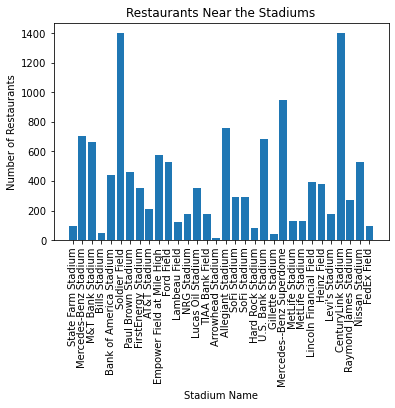

In [11]:
# Number of restaurants in 3000 meters radius from the team stadium
stadium_names = list(stadium_data_df["Stadium Name"])
y_pos = np.arange(len(stadium_names))
plt.bar(y_pos, number_business)
plt.xticks(y_pos, stadium_names, rotation = 90)
plt.title("Restaurants Near the Stadiums")
plt.xlabel("Stadium Name")
plt.ylabel("Number of Restaurants")
plt.show()